In [26]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.rcParams['figure.figsize'] = [9, 6]

import PHELPH
import ELPH_utils


kmax = 2.5
n_kmax = 100

tmax = 10000
n_tmax = 1001
t_vec = np.linspace(0,tmax,n_tmax)


system = PHELPH.PHELPH(kmax=kmax, n_kmax=n_kmax)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


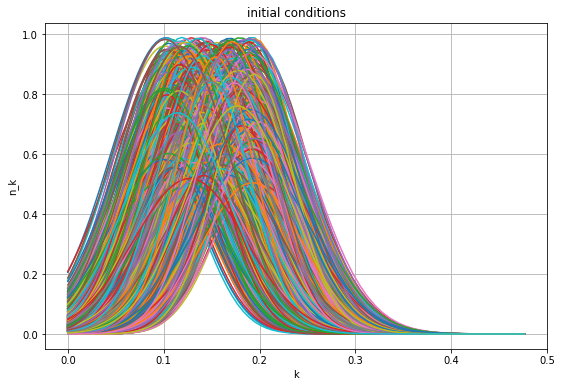

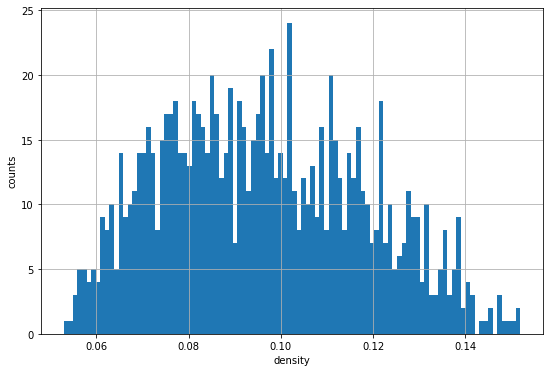

In [33]:
n_runs = 1000

rng = np.random.default_rng(817)

paras = np.zeros((n_runs,3))

paras[:,0] = rng.uniform(low=0.1, high=0.2, size=n_runs) #position
paras[:,1] = rng.uniform(low=0.04, high=0.06, size=n_runs) #width
paras[:,2] = 0.025 #density

inits = ELPH_utils.get_gaussian_inits(system, paras)


for r in range(n_runs):
    dist_max = np.amax(inits[r][:system.n_kmax])
#     inits[r][:n_kmax] *= 0.95 / dist_max
    inits[r][:system.n_kmax] *= rng.uniform(low=0.5, high=.99) / dist_max
    paras[r,2] = system.get_electron_density(inits[r][:system.n_kmax])

    
plt.grid()
for r in range(n_runs):
    plt.plot(system.E_el_vec,inits[r][:system.n_kmax])
plt.xlabel('k')
plt.ylabel('n_k')
plt.title('initial conditions')
plt.show()

plt.grid()
plt.hist(paras[:,2],bins=n_runs//10)
plt.xlabel('density')
plt.ylabel('counts')
plt.show()

In [34]:
I_trajectory_list = []
el_trajectory_list = []
el_scattering_list = []

for j in range(len(inits)):
    print('run ', j+1)
    trajectory = system.get_full_trajectory(inits[j], tmax=tmax, n_tmax=n_tmax)
    
    I_trajectory_list.append(trajectory[:,-1])
    el_trajectory_list.append(trajectory[:,:system.n_kmax])
    
    el_scattering = np.zeros_like(trajectory[:,:system.n_kmax])
    for m in range(el_scattering.shape[0]):
        el_scattering[m] = system.get_electron_scattering_terms(trajectory[m])
        
    el_scattering_list.append(el_scattering)

run  1
run  2
run  3
run  4
run  5
run  6
run  7
run  8
run  9
run  10
run  11
run  12
run  13
run  14
run  15
run  16
run  17
run  18
run  19
run  20
run  21
run  22
run  23
run  24
run  25
run  26
run  27
run  28
run  29
run  30
run  31
run  32
run  33
run  34
run  35
run  36
run  37
run  38
run  39
run  40
run  41
run  42
run  43
run  44
run  45
run  46
run  47
run  48
run  49
run  50
run  51
run  52
run  53
run  54
run  55
run  56
run  57
run  58
run  59
run  60
run  61
run  62
run  63
run  64
run  65
run  66
run  67
run  68
run  69
run  70
run  71
run  72
run  73
run  74
run  75
run  76
run  77
run  78
run  79
run  80
run  81
run  82
run  83
run  84
run  85
run  86
run  87
run  88
run  89
run  90
run  91
run  92
run  93
run  94
run  95
run  96
run  97
run  98
run  99
run  100
run  101
run  102
run  103
run  104
run  105
run  106
run  107
run  108
run  109
run  110
run  111
run  112
run  113
run  114
run  115
run  116
run  117
run  118
run  119
run  120
run  121
run  122
run  123
r

run  924
run  925
run  926
run  927
run  928
run  929
run  930
run  931
run  932
run  933
run  934
run  935
run  936
run  937
run  938
run  939
run  940
run  941
run  942
run  943
run  944
run  945
run  946
run  947
run  948
run  949
run  950
run  951
run  952
run  953
run  954
run  955
run  956
run  957
run  958
run  959
run  960
run  961
run  962
run  963
run  964
run  965
run  966
run  967
run  968
run  969
run  970
run  971
run  972
run  973
run  974
run  975
run  976
run  977
run  978
run  979
run  980
run  981
run  982
run  983
run  984
run  985
run  986
run  987
run  988
run  989
run  990
run  991
run  992
run  993
run  994
run  995
run  996
run  997
run  998
run  999
run  1000


In [38]:
ELPH_utils.save_trajectories(I_trajectory_list, filename='../../PHELPH_I_kmax2.5_nkmax_100_n1000')
ELPH_utils.save_trajectories(el_trajectory_list, filename='../../PHELPH_el_kmax2.5_nkmax_100_n1000')
ELPH_utils.save_trajectories(el_scattering_list, filename='../../PHELPH_el_scat_kmax2.5_nkmax_100_n1000')

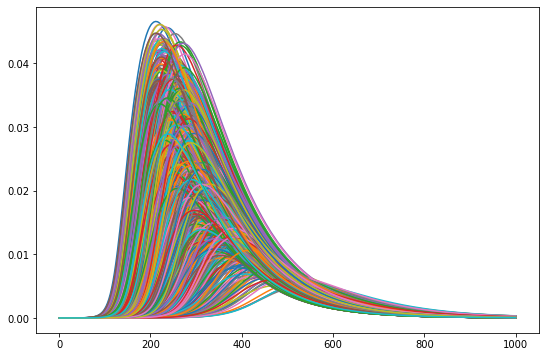

In [35]:
for I in I_trajectory_list:
    plt.plot(I)
    
plt.show()

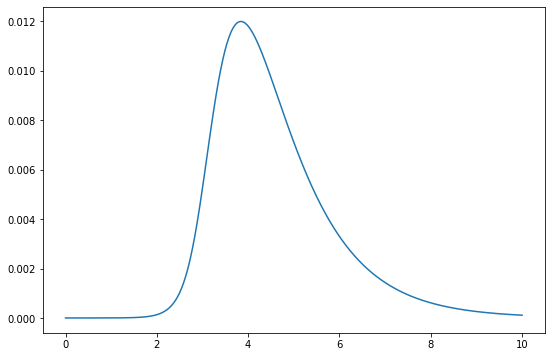

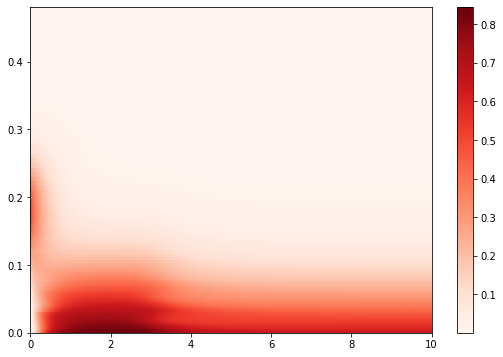

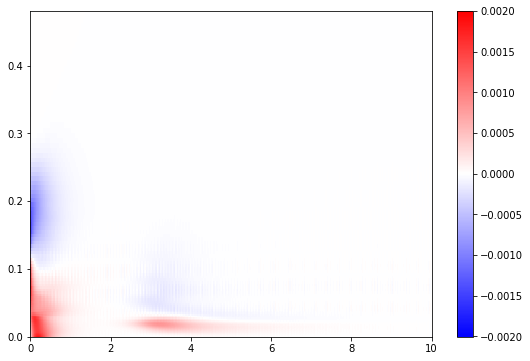

In [39]:
ind = 1

plt.plot(t_vec/1000,I_trajectory_list[ind])
plt.show()


plt.pcolormesh(t_vec/1000, system.E_el_vec, el_trajectory_list[ind].T,cmap='Reds')
plt.colorbar()
plt.show()

plt.pcolormesh(t_vec/1000, system.E_el_vec, el_scattering_list[ind].T,
               cmap='bwr',
               norm=colors.CenteredNorm(vcenter=0.0))
plt.colorbar()
plt.show()